In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [5]:
df1=pd.read_csv("train.csv")

In [6]:
pd.set_option('max_rows', 99999)

In [7]:
df1.shape

(1460, 81)

#DATA ANALYSIS

######1.NULL Values
######2.Numerical Values
######3.Outliers
######4.Catogorical Features

In [8]:
dp1=df1.copy()

In [9]:
dp1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#######Storing all the features with null values and comparing them with output label

In [10]:
features_having_nan=[feature for feature in dp1.columns if dp1[feature].isnull().sum()>1]
for feature in features_having_nan:
    print("{} has {} percentage of Null values".format(feature,np.round(dp1[feature].isnull().mean(),4)*100))

LotFrontage has 17.740000000000002 percentage of Null values
Alley has 93.77 percentage of Null values
MasVnrType has 0.5499999999999999 percentage of Null values
MasVnrArea has 0.5499999999999999 percentage of Null values
BsmtQual has 2.53 percentage of Null values
BsmtCond has 2.53 percentage of Null values
BsmtExposure has 2.6 percentage of Null values
BsmtFinType1 has 2.53 percentage of Null values
BsmtFinType2 has 2.6 percentage of Null values
FireplaceQu has 47.260000000000005 percentage of Null values
GarageType has 5.55 percentage of Null values
GarageYrBlt has 5.55 percentage of Null values
GarageFinish has 5.55 percentage of Null values
GarageQual has 5.55 percentage of Null values
GarageCond has 5.55 percentage of Null values
PoolQC has 99.52 percentage of Null values
Fence has 80.75 percentage of Null values
MiscFeature has 96.3 percentage of Null values


In [11]:
len(features_having_nan)

18

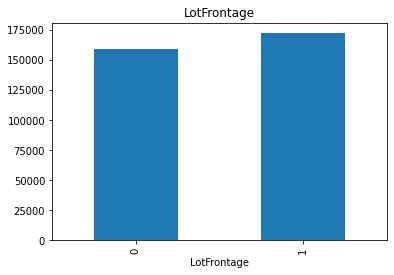

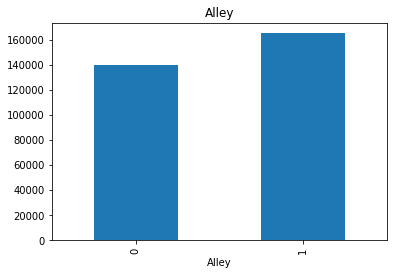

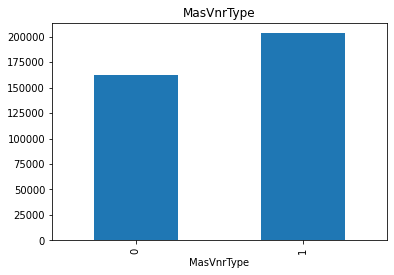

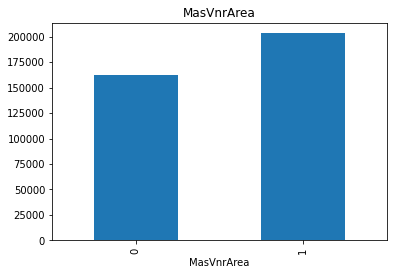

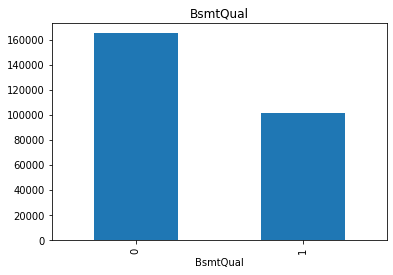

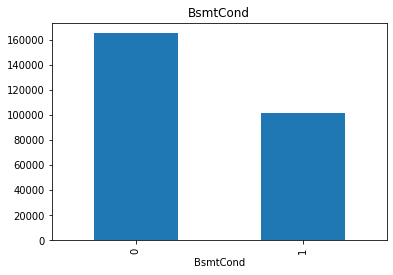

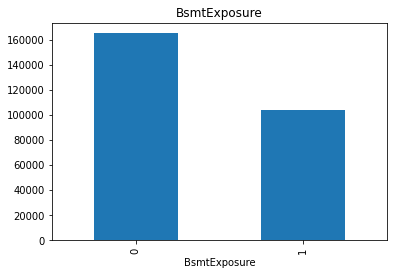

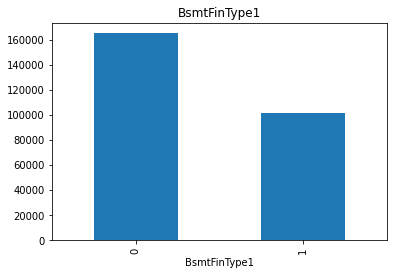

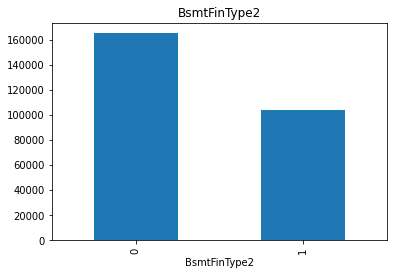

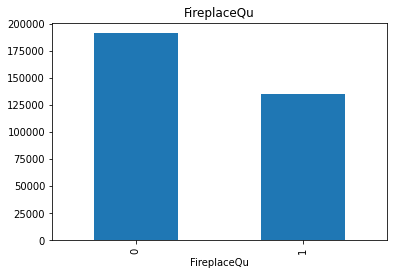

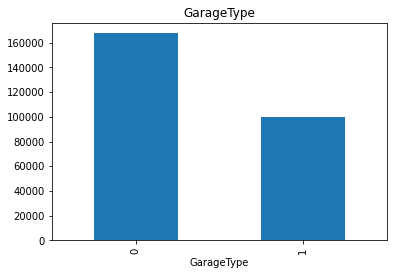

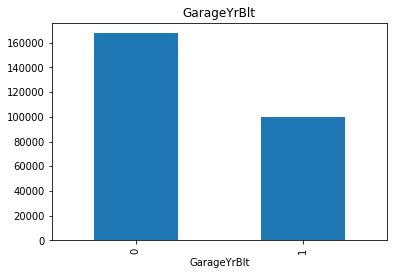

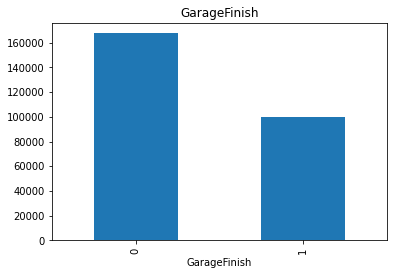

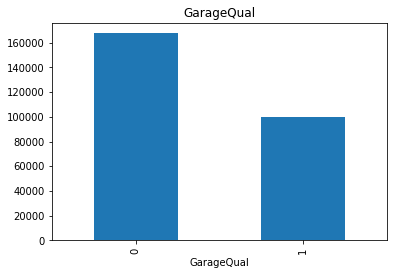

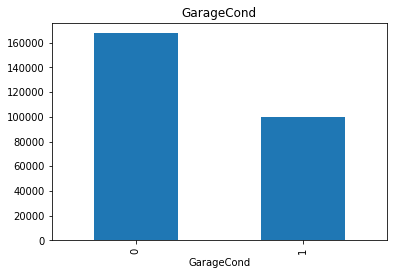

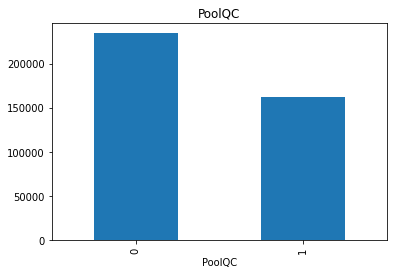

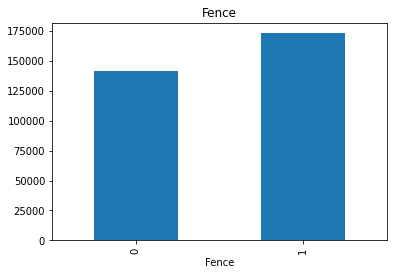

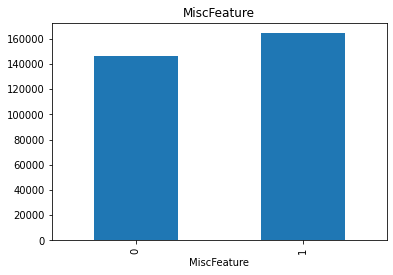

In [ ]:
for feature in features_having_nan:
    dp=dp1.copy()
    dp[feature]=np.where(dp[feature].isnull(),1,0)
    dp.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [12]:
NumericalVariables = [feature for feature in dp1.columns if dp1[feature].dtypes!='O']

In [ ]:
dp1[NumericalVariables].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [13]:
Year_Features=[feature for feature in dp1.columns if 'Yr' in feature or 'Year' in feature]

In [ ]:
dp1[Year_Features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0.5, 1.0, 'House price vs year sold')

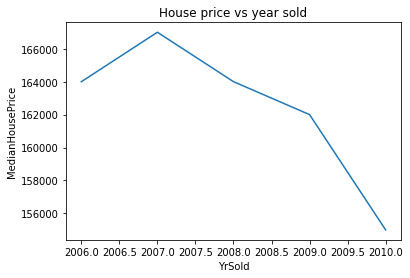

In [ ]:
dp1.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('MedianHousePrice')
plt.title('House price vs year sold')

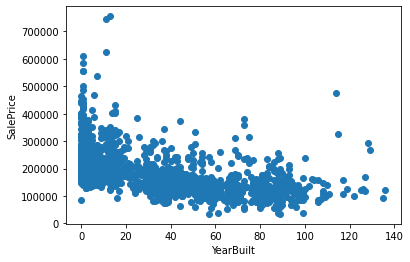

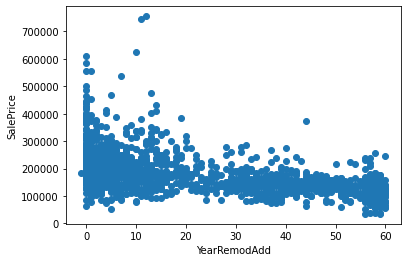

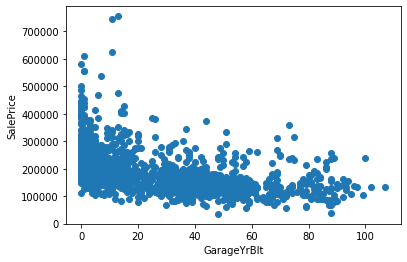

In [ ]:
for feature in Year_Features:
    if feature!='YrSold':
        dp=dp1.copy()
        dp[feature]=dp['YrSold']-dp[feature]
        plt.scatter(dp[feature],dp['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [14]:
Discrete_Features=[feature for feature in NumericalVariables if len(dp1[feature].unique())<25 and feature not in Year_Features+['Id']]

In [ ]:
Discrete_Features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

########Now compare each label with saleprice

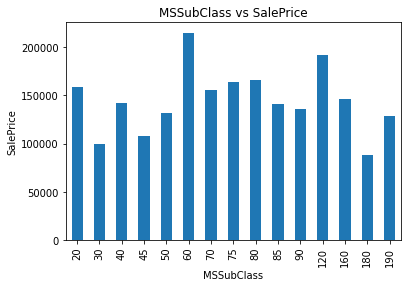

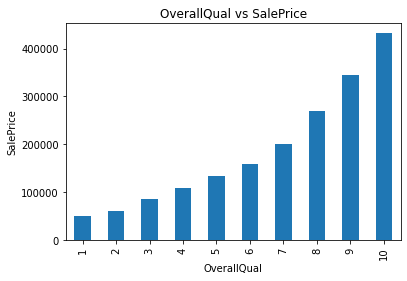

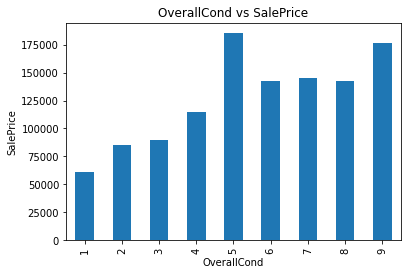

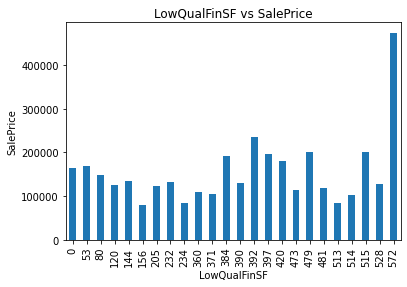

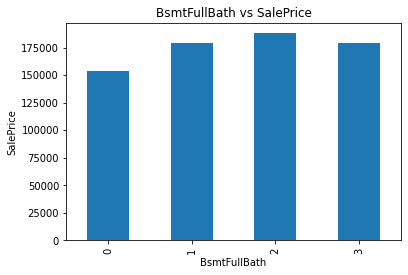

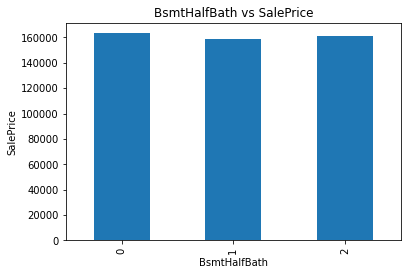

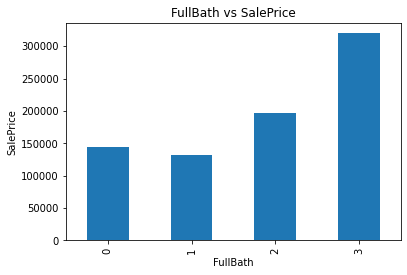

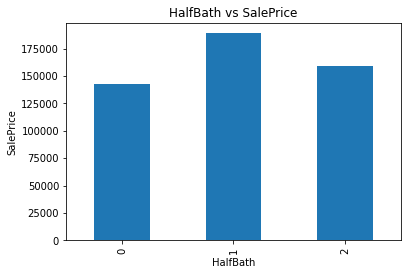

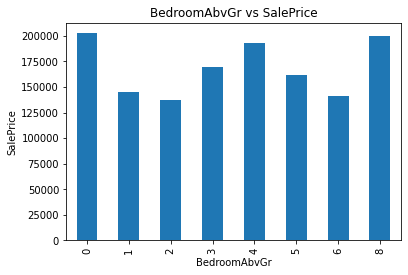

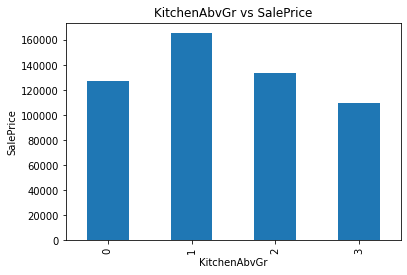

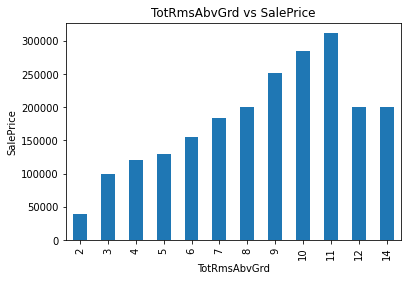

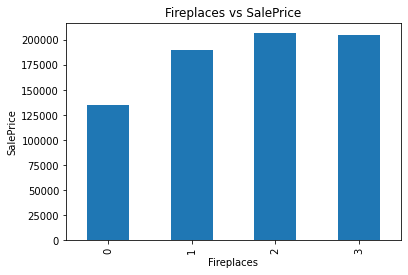

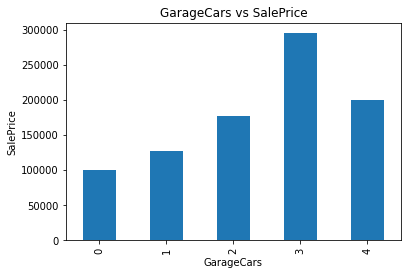

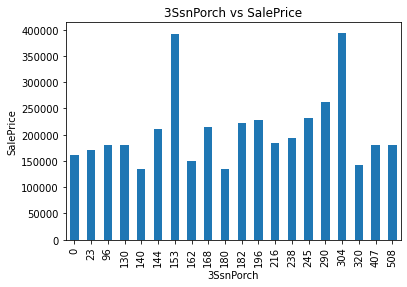

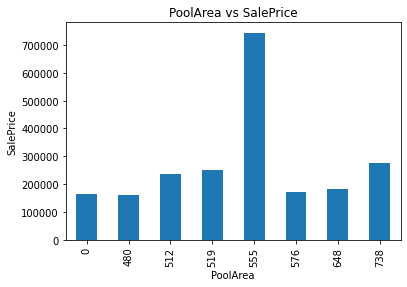

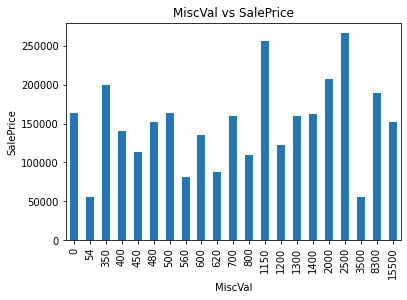

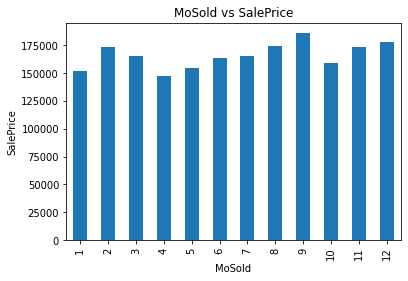

In [ ]:
for feature in Discrete_Features:
    dp=dp1.copy()
    dp.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title("{} vs SalePrice".format(feature))
    plt.show()

######From above graphs we need to observe and try to find if there any relation between data.

######We will see in the continuos variables

In [15]:
Continuous_Features=[feature for feature in NumericalVariables if feature not in Discrete_Features and feature not in Year_Features+['Id']]

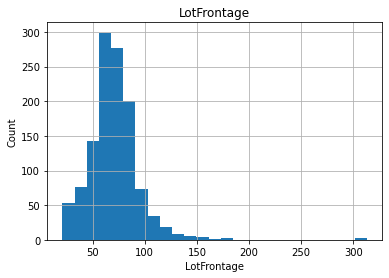

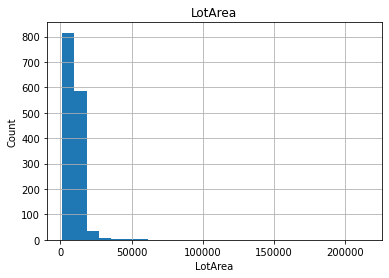

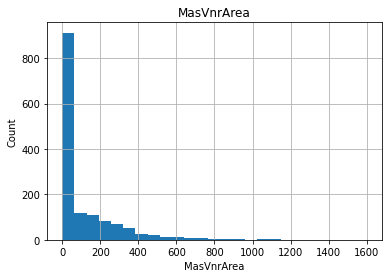

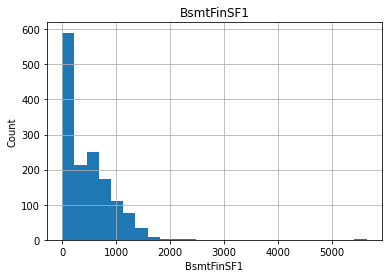

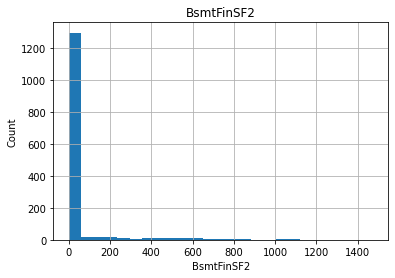

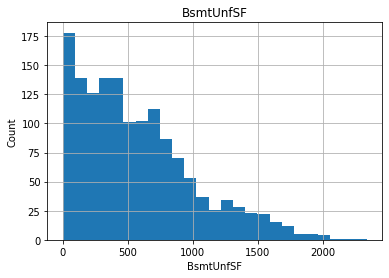

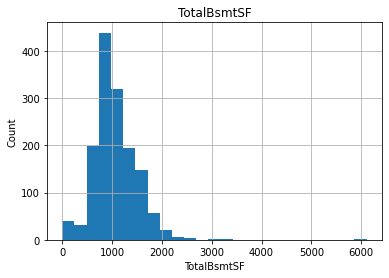

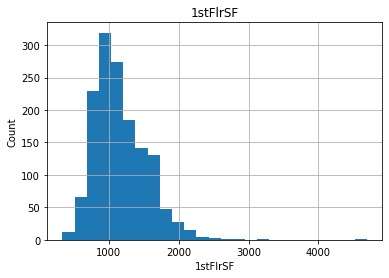

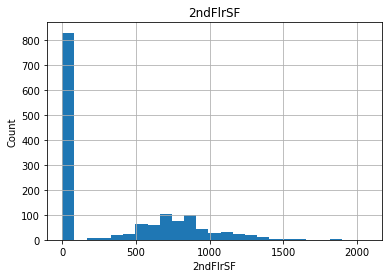

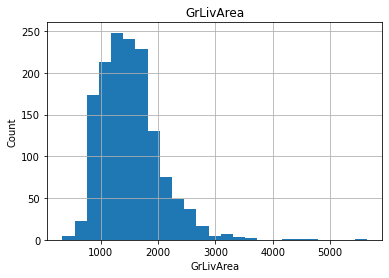

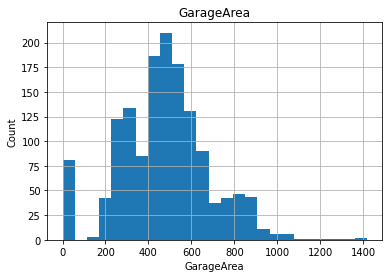

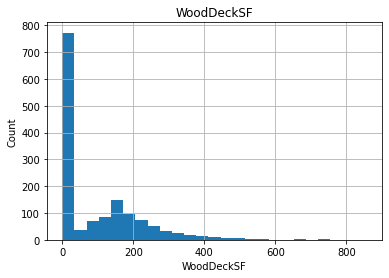

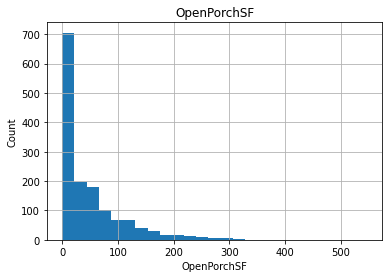

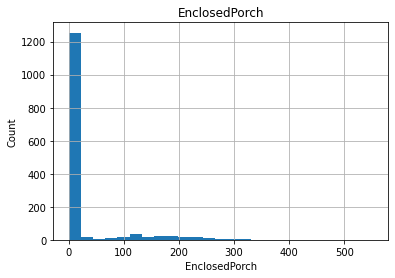

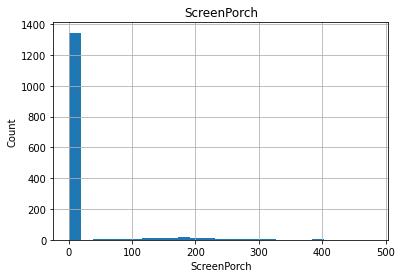

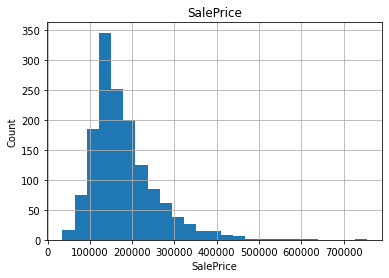

In [ ]:
for feature in Continuous_Features:
    dp=dp1.copy()
    dp[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("{}".format(feature))
    plt.show()

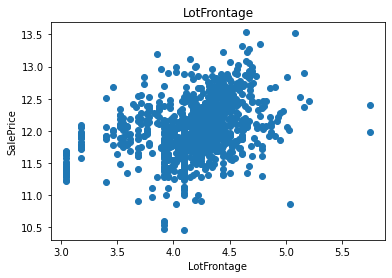

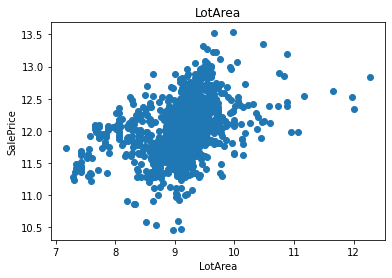

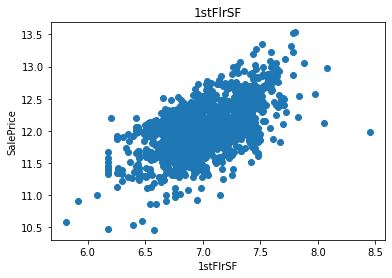

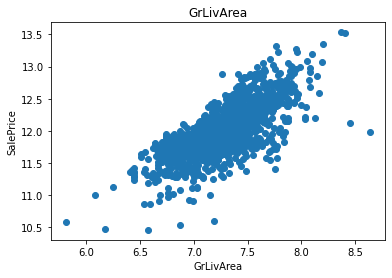

In [ ]:
for feature in Continuous_Features:
    if feature != 'SalePrice':
        dp=dp1.copy()
        if 0 in dp[feature].unique():
            pass
        else:
            dp[feature]=np.log(dp[feature])
            dp['SalePrice']=np.log(dp['SalePrice'])
            plt.scatter(dp[feature],dp['SalePrice'])
            plt.xlabel(feature)
            plt.ylabel('SalePrice')
            plt.title(feature)
            plt.show()


######Outliers


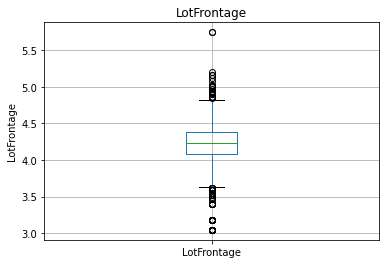

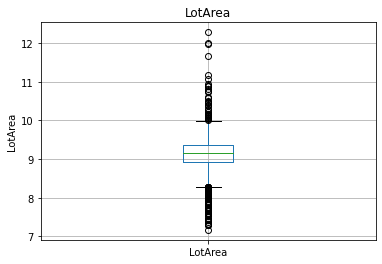

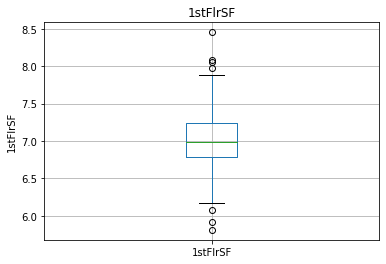

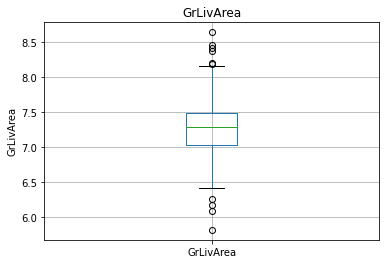

In [17]:
for feature in Continuous_Features:
    if feature != 'SalePrice':
        dp=dp1.copy()
        if 0 in dp[feature].unique():
            pass
        else:
            dp[feature]=np.log(dp[feature])
            dp.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()


In [18]:
Catogorical_features = [feature for feature in dp1.columns if dp[feature].dtypes=='O'] 

In [19]:
Catogorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in Catogorical_features:
    print(feature,"The no. of catogiries are {}".format(len(dp1[feature].unique())))
    print()

MSZoning The no. of catogiries are 5

Street The no. of catogiries are 2

Alley The no. of catogiries are 3

LotShape The no. of catogiries are 4

LandContour The no. of catogiries are 4

Utilities The no. of catogiries are 2

LotConfig The no. of catogiries are 5

LandSlope The no. of catogiries are 3

Neighborhood The no. of catogiries are 25

Condition1 The no. of catogiries are 9

Condition2 The no. of catogiries are 8

BldgType The no. of catogiries are 5

HouseStyle The no. of catogiries are 8

RoofStyle The no. of catogiries are 6

RoofMatl The no. of catogiries are 8

Exterior1st The no. of catogiries are 15

Exterior2nd The no. of catogiries are 16

MasVnrType The no. of catogiries are 5

ExterQual The no. of catogiries are 4

ExterCond The no. of catogiries are 5

Foundation The no. of catogiries are 6

BsmtQual The no. of catogiries are 5

BsmtCond The no. of catogiries are 5

BsmtExposure The no. of catogiries are 5

BsmtFinType1 The no. of catogiries are 7

BsmtFinType2 Th

In [ ]:
for feature in Catogorical_features:
    print(feature,"The no. of catogiries are {}".format(dp1[feature].value_counts()))
    print()

MSZoning The no. of catogiries are RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street The no. of catogiries are Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley The no. of catogiries are Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape The no. of catogiries are Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour The no. of catogiries are Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities The no. of catogiries are AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig The no. of catogiries are Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope The no. of catogiries are Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood The no. of catogiries are NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     8

######## Now we will see the relationship between saleprice and catogorical features

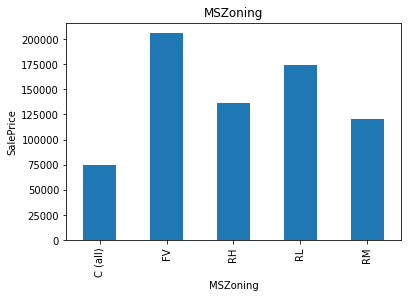

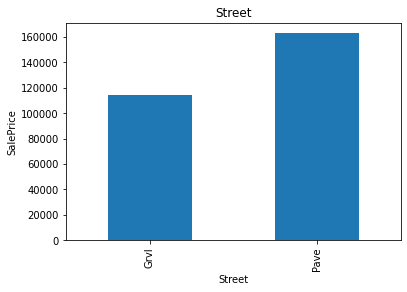

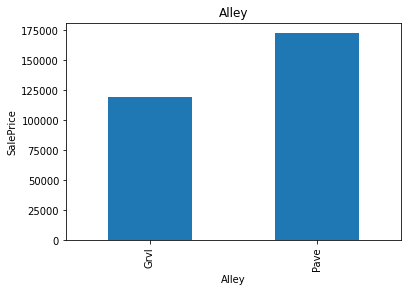

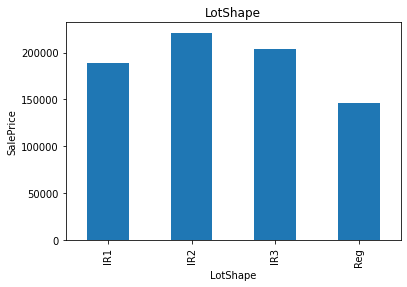

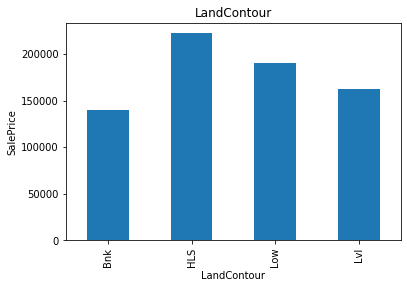

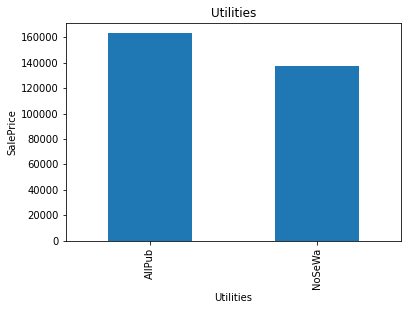

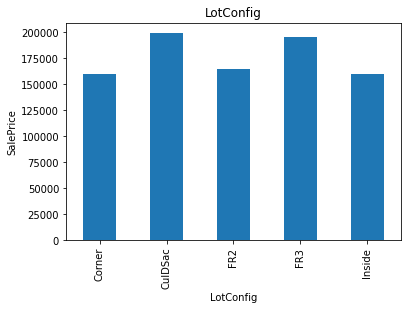

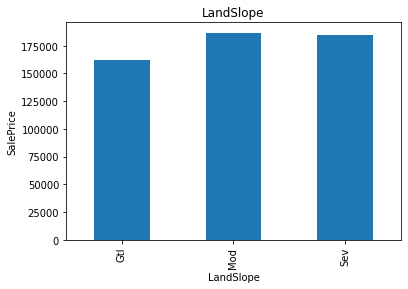

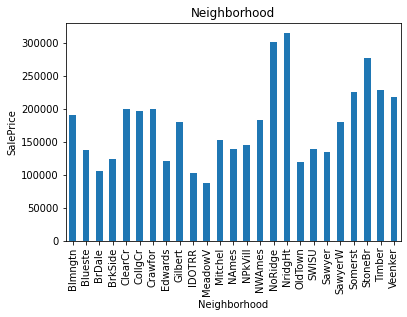

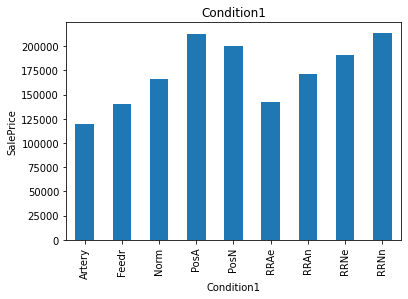

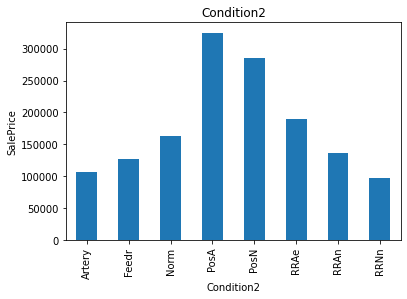

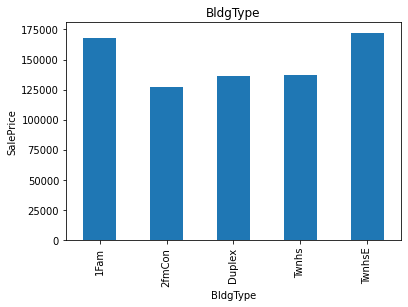

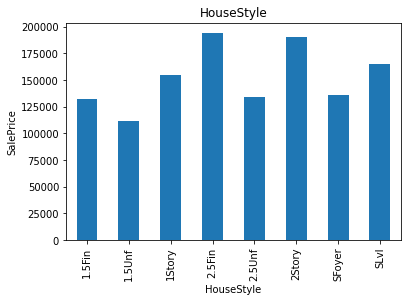

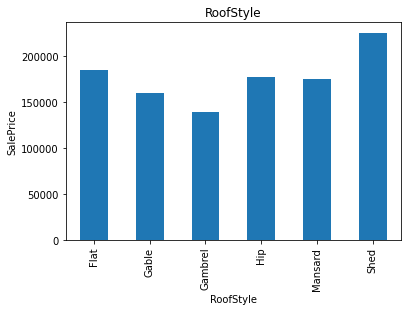

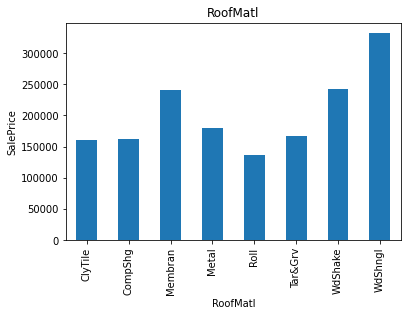

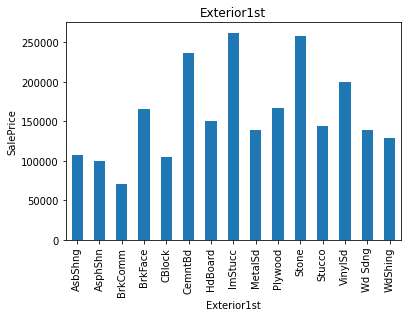

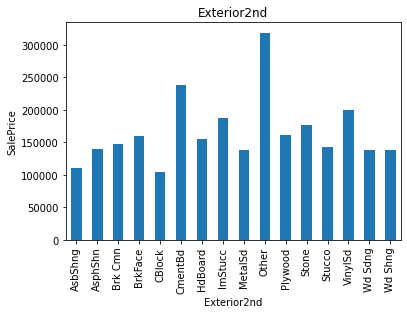

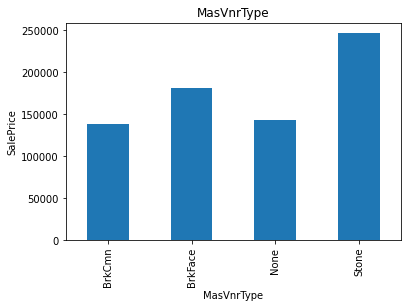

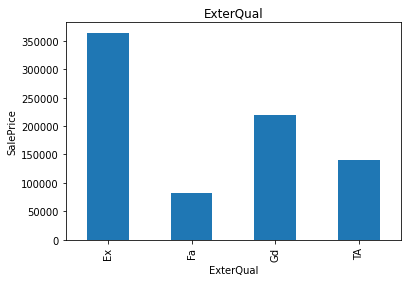

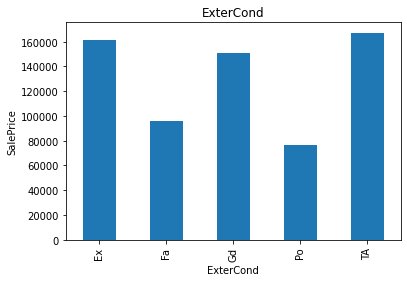

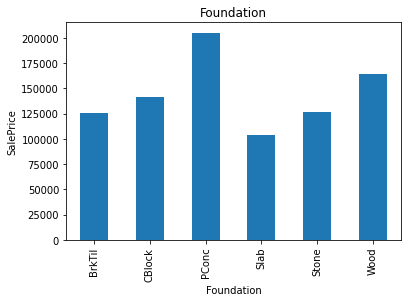

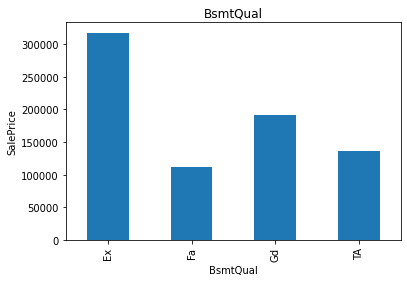

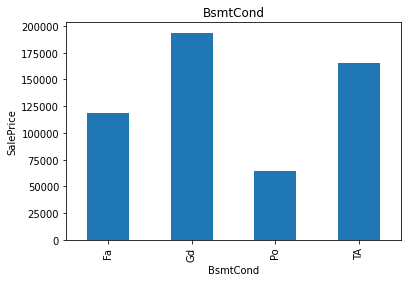

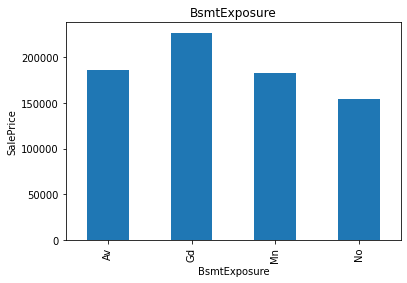

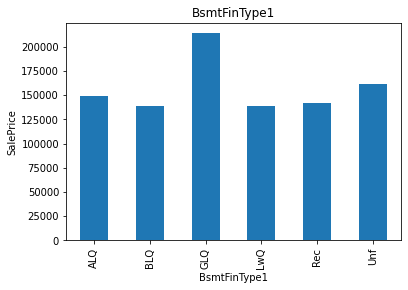

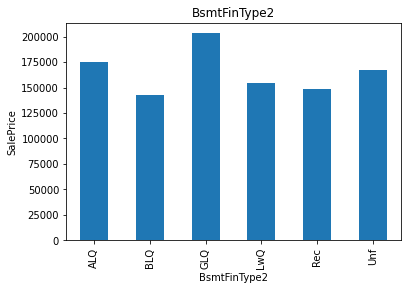

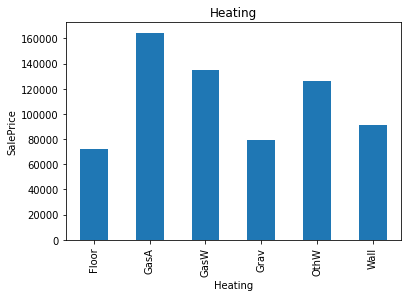

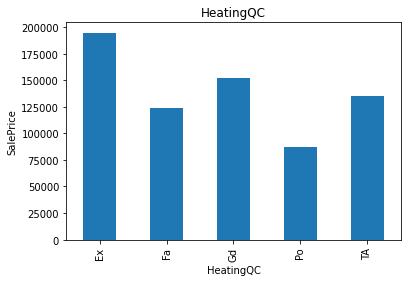

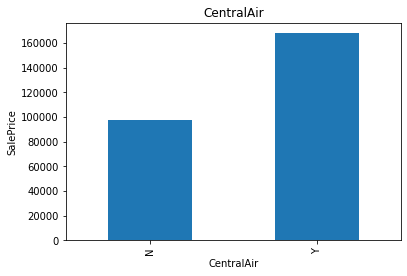

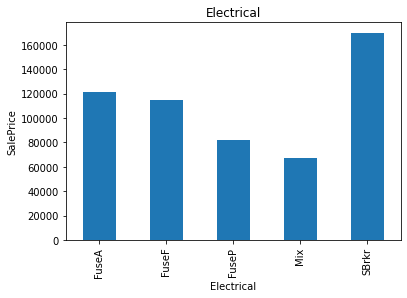

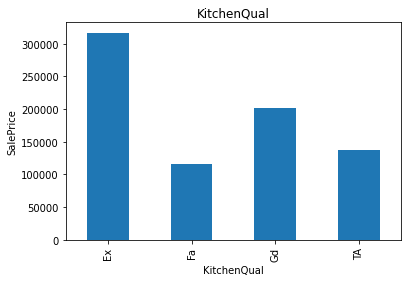

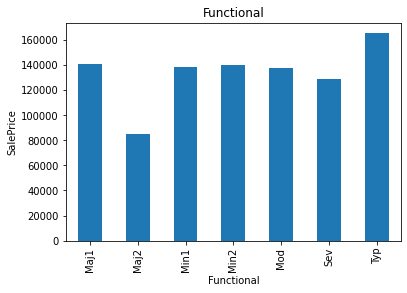

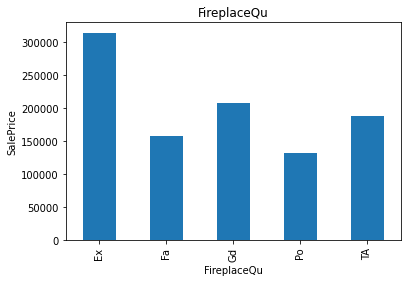

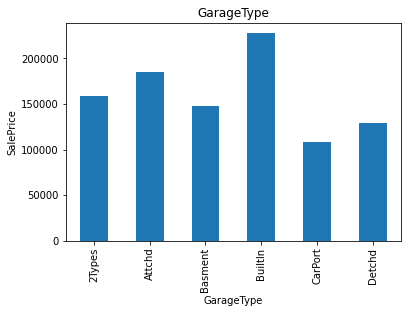

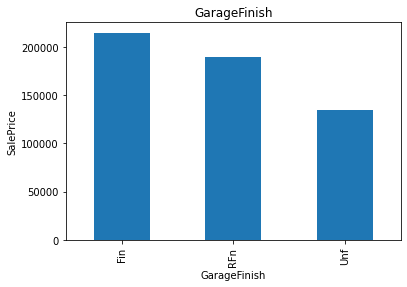

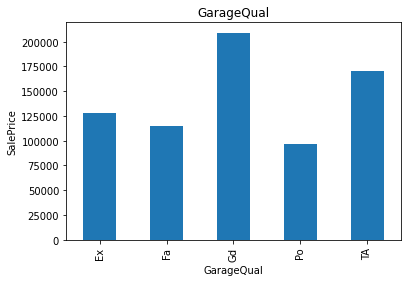

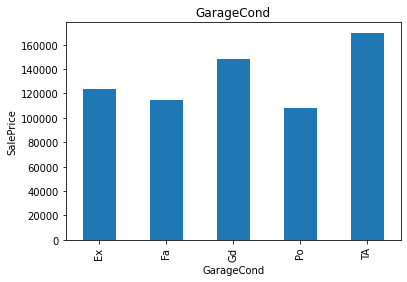

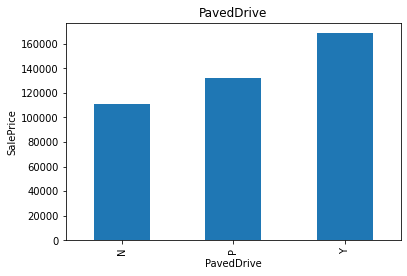

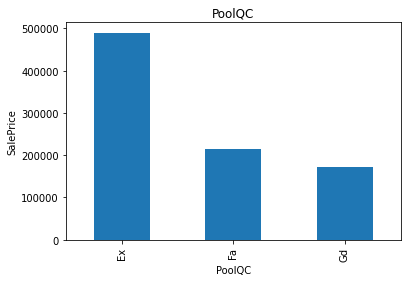

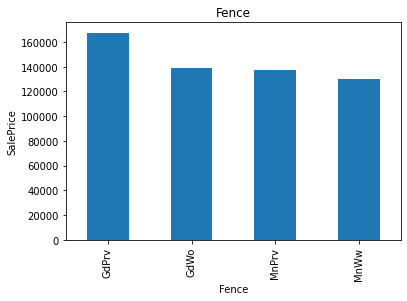

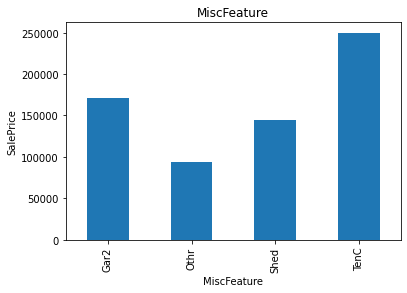

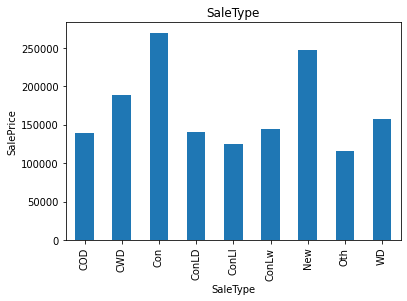

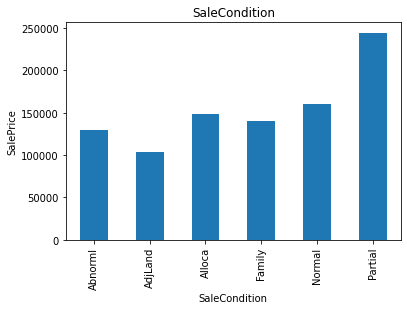

In [ ]:
for feature in Catogorical_features:
    dp=dp1.copy()
    dp.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# FeatureEngineering

######Handling The Things We observed In The DataAnalysis Part

####Handling Null values in Catogorical Features

In [20]:
Catogorical_features_having_nan=[feature for feature in dp1.columns if dp1[feature].isnull().sum()>1 and dp1[feature].dtypes=='O']
for feature in Catogorical_features_having_nan:
    print("{} has {} percentage of Null values".format(feature,np.round(dp1[feature].isnull().mean(),4)*100))

Alley has 93.77 percentage of Null values
MasVnrType has 0.5499999999999999 percentage of Null values
BsmtQual has 2.53 percentage of Null values
BsmtCond has 2.53 percentage of Null values
BsmtExposure has 2.6 percentage of Null values
BsmtFinType1 has 2.53 percentage of Null values
BsmtFinType2 has 2.6 percentage of Null values
FireplaceQu has 47.260000000000005 percentage of Null values
GarageType has 5.55 percentage of Null values
GarageFinish has 5.55 percentage of Null values
GarageQual has 5.55 percentage of Null values
GarageCond has 5.55 percentage of Null values
PoolQC has 99.52 percentage of Null values
Fence has 80.75 percentage of Null values
MiscFeature has 96.3 percentage of Null values


####Replace the Null Values with some new label

In [21]:
def Replace_with_label(dp1,Catogorical_features_having_nan):
    dp=dp1.copy()
    dp[Catogorical_features_having_nan]=dp[Catogorical_features_having_nan].fillna('Empty')
    return dp
dp1=Replace_with_label(dp1,Catogorical_features_having_nan)

In [22]:
dp1[Catogorical_features_having_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [23]:
dp1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Empty,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Empty,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Empty,Empty,Empty,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Empty,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Empty,Empty,Empty,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Empty,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Empty,Empty,Empty,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Empty,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Empty,Empty,Empty,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Empty,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Empty,Empty,Empty,0,12,2008,WD,Normal,250000


###### Handling Null values in Numeric Features

In [24]:
Numeric_features_having_nan=[feature for feature in dp1.columns if dp1[feature].isnull().sum()>1 and dp1[feature].dtypes!='O']
for feature in Numeric_features_having_nan:
    print("{} has {} percentage of Null values".format(feature,np.round(dp1[feature].isnull().mean(),4)*100))

LotFrontage has 17.740000000000002 percentage of Null values
MasVnrArea has 0.5499999999999999 percentage of Null values
GarageYrBlt has 5.55 percentage of Null values


#####Filling Numeric Nan Values

In [25]:
for feature in Numeric_features_having_nan:
    Med=dp1[feature].median()
    dp1[feature+'nan']=np.where(dp1[feature].isnull(),1,0)
    dp1[feature].fillna(Med,inplace=True)

In [26]:
dp1[Numeric_features_having_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#####Temporal_data

#####We will just change the year into no. of years before the Yearsold Like that ..so that we can actually relate the variables

In [ ]:
Year_Features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [27]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dp1[feature]=dp1['YrSold']-dp1[feature]

In [28]:
a=[]
for feature in Continuous_Features:
    if 0 in dp[feature].unique():
        pass
    else:
        a.append(feature)

In [ ]:
a

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [29]:
for feature in a:
    dp1[feature]=np.log(dp1[feature])

In [ ]:
dp1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Empty,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Empty,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Empty,Empty,Empty,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Empty,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Empty,Empty,Empty,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Empty,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Empty,Empty,Empty,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Empty,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Empty,Empty,Empty,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Empty,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Empty,Empty,Empty,0,12,2008,WD,Normal,12.429216,0,0,0


#####Handling Rare Catogorical Features...Like less than 1% in total column data

In [ ]:
Catogorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
for feature in Catogorical_features:
    t=dp1.groupby(feature)['SalePrice'].count()/len(dp1)
    t_df=t[t>0.01].index
    dp1[feature]=np.where(dp1[feature].isin(t_df),dp1[feature],'Rare')

In [ ]:
dp1[Catogorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Empty,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Empty,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal
1,RL,Pave,Empty,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal
2,RL,Pave,Empty,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal
3,RL,Pave,Empty,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Empty,Empty,Empty,WD,Abnorml
4,RL,Pave,Empty,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal


In [31]:
for feature in Catogorical_features:
    labels_ordered=dp1.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dp1[feature]=dp1[feature].map(labels_ordered)

In [32]:
dp1[Catogorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,1,1,0,0,14,2,1,3,5,0,0,10,10,2,2,3,4,3,3,1,6,5,2,4,1,3,2,4,1,4,2,2,3,2,0,4,2,2,3
1,3,1,2,0,1,1,2,0,11,1,1,3,3,0,0,4,3,1,1,3,2,3,3,4,4,5,2,4,1,3,1,4,3,4,2,2,3,2,0,4,2,2,3
2,3,1,2,1,1,1,0,0,14,2,1,3,5,0,0,10,10,2,2,3,4,3,3,2,6,5,2,4,1,3,2,4,3,4,2,2,3,2,0,4,2,2,3
3,3,1,2,1,1,1,1,0,16,2,1,3,5,0,0,2,4,1,1,3,1,2,4,1,4,5,2,3,1,3,2,4,4,2,1,2,3,2,0,4,2,2,0
4,3,1,2,1,1,1,2,0,22,2,1,3,5,0,0,10,10,2,2,3,4,3,3,3,6,5,2,4,1,3,2,4,3,4,2,2,3,2,0,4,2,2,3


#Feature Scaling

##### Getting all features into a list on which we perform scaling

In [33]:
dp1.shape

(1460, 84)

In [34]:
Features_For_Scaling=[feature for feature in dp1.columns if feature not in ['Id','SalePrice'] ]

In [35]:
dp1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,...,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,...,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,...,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,...,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,...,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


In [36]:
scaler=MinMaxScaler()
scaler.fit(dp1[Features_For_Scaling])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
X_tra.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,...,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,...,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,...,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,...,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,...,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [38]:
X_tra=pd.concat([dp1[['Id','SalePrice']].reset_index(drop=True)
,pd.DataFrame(scaler.transform(dp1[Features_For_Scaling]),columns=Features_For_Scaling)],axis=1)

In [ ]:
X_tra.SalePrice.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [40]:
X_tra.to_csv('Project1.csv',index=False)

#Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_tra.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,...,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,...,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,...,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,...,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,...,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
Y_Train=X_tra[['SalePrice']]

In [ ]:
X_Train=X_tra.drop(['Id','SalePrice'],axis=1)

In [ ]:
feature_selection_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_selection_model.fit(X_Train,Y_Train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_selection_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [ ]:
sel=X_Train.columns[(feature_selection_model.get_support())]

In [ ]:
X_Train=X_Train[sel]

In [ ]:
X_Train.shape

(1460, 21)

In [ ]:
Y_Train.shape

(1460, 1)

# TestTrainSplit

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_Train,Y_Train,test_size=0.2)

In [ ]:
import xgboost
Regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1.0]

In [ ]:
n_estimators = [100,500,900,1100,1500]
booster = ['gbtree','gblinear']
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'booster' : booster,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'base_score' : base_score
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=Regressor,param_distributions=hyperparameter_grid,cv=5,
                             n_iter=50,scoring='neg_mean_absolute_error',n_jobs=4,verbose=5,return_train_score=True,random_state=42)

In [ ]:
x_train.ilo

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
601,0.176471,0.25,0.000000,0.555556,0.950820,0.0,0.50,0.25,0.50,1.0,0.320969,0.500581,0.000000,0.666667,0.333333,0.8,0.4,0.333333,0.25,0.5,0.75
255,0.235294,0.75,0.590909,0.666667,0.131148,0.0,0.75,0.25,1.00,1.0,0.416883,0.681182,0.000000,0.666667,0.333333,0.6,1.0,1.000000,0.50,1.0,0.75
810,0.000000,0.75,0.545455,0.555556,0.131148,1.0,0.50,0.25,0.25,1.0,0.516894,0.483180,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0,0.75
1373,0.000000,0.75,1.000000,1.000000,0.098361,1.0,1.00,1.00,1.00,1.0,0.781366,0.730402,0.333333,1.000000,0.666667,0.8,0.8,0.666667,0.75,1.0,0.75
394,0.176471,0.75,0.181818,0.444444,0.950820,0.0,0.50,0.25,0.75,1.0,0.298482,0.399755,0.000000,0.333333,0.000000,0.2,0.4,0.333333,0.25,1.0,0.75


In [ ]:
y_train.head()

,SalePrice
601,11.856515
255,12.345835
810,12.106252
1373,13.053013
394,11.599103


In [ ]:
input1 = x_train.iloc[0].to_numpy()
input2 = x_train.iloc[1].to_numpy()
input3 = x_train.iloc[2].to_numpy()
input4 = x_train.iloc[3].to_numpy()

In [ ]:
x_train=x_train.to_numpy()

In [ ]:
y_train=y_train.to_numpy()

In [ ]:
y_train

In [ ]:
random_cv.fit(x_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(x_train,y_train)

[06:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
import pickle



import pickle
filename=open('Project1.pkl','wb')
pickle.dump(regressor,filename)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
pred=[]
for i in y_pred:
    pred.append(i)
test=[]
for i in y_test:
    for j in i:
        test.append(j)
y_pred=np.array(pred)
y_test = np.array(test)

 I took RootMeanSquareError as my performance metric.

In [ ]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2))

In [ ]:
x_train.columns

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [ ]:
print(rmse)

0.12170350344386181
